#  1st Activation function

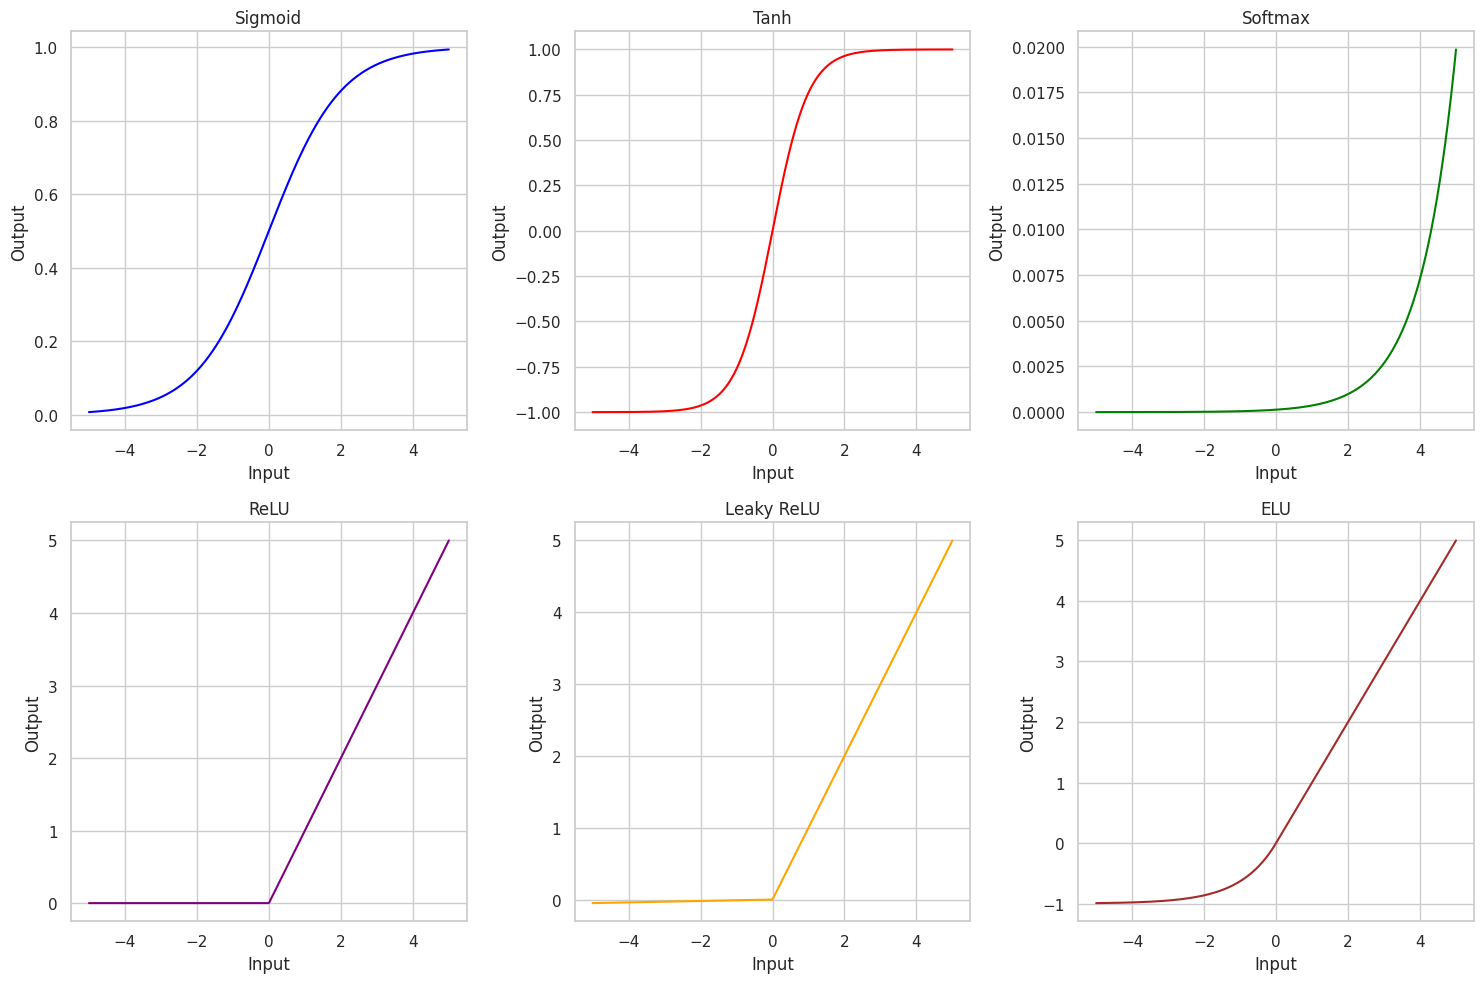

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = lambda x: np.tanh(x)
softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
relu = lambda x: np.maximum(0, x)
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)
elu = lambda x, alpha=1.0: np.where(x > 0, x, alpha * (np.exp(x) - 1))

x = np.linspace(-5, 5, 500)

activation = [sigmoid, tanh, softmax, relu, leaky_relu, elu]
titles = ["Sigmoid", "Tanh", "Softmax", "ReLU", "Leaky ReLU", "ELU"]
colors = ["blue", "red", "green", "purple", "orange", "brown"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for index, fun in enumerate(activation):
    y = fun(x)
    axes[index//3, index % 3].plot(x, y, color=colors[index])
    axes[index//3, index % 3].set_title(titles[index])
    axes[index//3, index % 3].grid(True)
    
for ax in axes.flat:
    ax.set_xlabel("Input")
    ax.set_ylabel("Output")

plt.tight_layout()
plt.show()

# 2nd AND NOT 

In [4]:
import numpy as np

def mp_neuron(inputs, weights, threshold):
    weighted_sum = np.dot(inputs, weights)
    output = int(weighted_sum >= threshold)
    return output
    
def and_not(x1, x2):
    weights = [1, -1] 
    threshold = 1   
    inputs = np.array([x1, x2])
    output = mp_neuron(inputs, weights, threshold)
    return output

result = [(i, j, and_not(i, j)) for i in range(2) for j in range(2)]

print(f"{'X1':<5} {'X2':<5} {'Y':<5}")
print("-" * 15)

for row in result:
    print(f"{row[0]:<5} {row[1]:<5} {row[2]:<5}")


X1    X2    Y    
---------------
0     0     0    
0     1     0    
1     0     1    
1     1     0    


# 3rd perceptron

In [5]:
import numpy as np

step_function = lambda x: 1 if x >= 0 else 0

training_data = [
    {'input': [int(b) for b in f"{n:06b}"], 'label': (n % 2) ^ 1}
    for n in range(48, 58)
]

weights = np.array([0, 0, 0, 0, 0, 1])

for data in training_data:
    inpt = np.array(data['input'])
    label = data['label']
    output = step_function(np.dot(inpt, weights))
    error = label - output
    weights += inpt * error


# Take Input from user
j = int(input("Enter a Number (0-63): "))

inpt = np.array([int(x) for x in list('{0:06b}'.format(j))])
output = "odd" if step_function(np.dot(inpt, weights)) == 0 else "even"
print(j, " is ", output)

Enter a Number (0-63):  50


50  is  even


# 4th  Decision boundry 

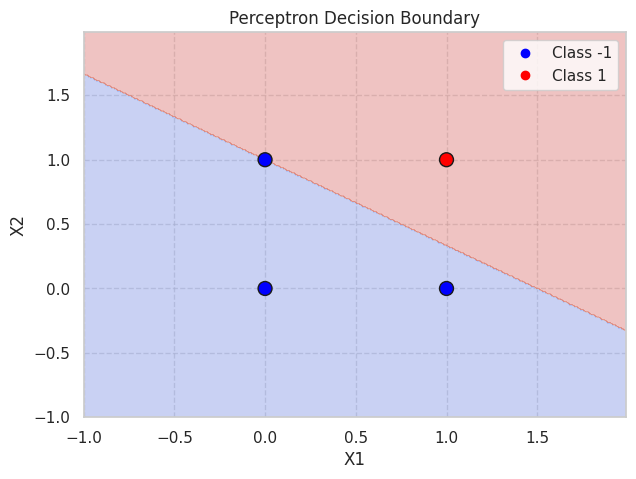

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, -1, -1, 1])

w = np.zeros(X.shape[1])
b = 0

for _ in range(6):
    for i in range(X.shape[0]):
        y_pred = np.sign(np.dot(X[i], w) + b)
        if y_pred != Y[i]:
            w += 0.3 * Y[i] * X[i]
            b += 0.3 * Y[i]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k', s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Boundary')
plt.grid(True, linestyle='--', alpha=0.6)
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Class -1', 'Class 1'], loc='upper right')

plt.show()

# 5th 5x3 Matrix

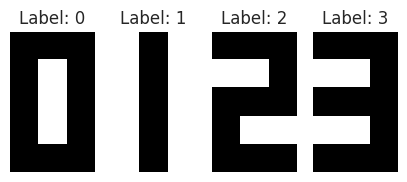

Test 1: Predicted Number is 1
Test 2: Predicted Number is 2
Test 3: Predicted Number is 3
Test 4: Predicted Number is 0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

X_train = np.array([
    [[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]],  # 0
    [[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]],  # 1
    [[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]],  # 2
    [[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]   # 3
])
y_train = [0, 1, 2, 3]

fig, axes = plt.subplots(1, len(X_train), figsize=(5, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray_r')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()

clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000)
clf.fit(X_train.reshape(len(X_train), -1), y_train)

X_test = np.array([
    [[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]],  # 1
    [[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]],  # 2
    [[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]],  # 3
    [[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]   # 0
])

y_pred = clf.predict(X_test.reshape(len(X_test), -1))
for i, pred in enumerate(y_pred):
    print(f"Test {i + 1}: Predicted Number is {pred}")

# 6th forwardproportion

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score

# Activation function (Sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize dataset (X: input, y: output)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR input
y = np.array([[0], [1], [1], [0]])  # XOR output

# Set network parameters
input_neurons = 2
hidden_neurons = 4  # Hidden layer neurons
output_neurons = 1
learning_rate = 0.5

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_neurons))
bias_output = np.random.uniform(-1, 1, (1, output_neurons))

# Training process
epochs = 10000
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    # Compute error
    error = y - output

    # Back Propagation
    output_gradient = error * sigmoid_derivative(output)
    hidden_gradient = output_gradient.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(output_gradient) * learning_rate
    weights_input_hidden += X.T.dot(hidden_gradient) * learning_rate
    bias_output += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.abs(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# Final Output
print("Final Output after Training:")
print(output)

# Convert predictions to binary using threshold 0.5
y_pred_classes = (output > 0.5).astype(int)

# Calculate Accuracy
accuracy = accuracy_score(y, y_pred_classes)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

Epoch 0, Loss: 0.5012495691702666
Epoch 1000, Loss: 0.07892380962319563
Epoch 2000, Loss: 0.04200729440540749
Epoch 3000, Loss: 0.03137807616202634
Epoch 4000, Loss: 0.025949337857365067
Epoch 5000, Loss: 0.02254409645691593
Epoch 6000, Loss: 0.020163626571278292
Epoch 7000, Loss: 0.01838364481836235
Epoch 8000, Loss: 0.0169900605067304
Epoch 9000, Loss: 0.015861924358941435
Final Output after Training:
[[0.01572886]
 [0.98627449]
 [0.98425486]
 [0.01450469]]

Model Accuracy: 100.00%


# 7th XOR backward propogation

In [13]:
import numpy as np

# Activation function: Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(s):
    # s is the output from the sigmoid function
    return s * (1 - s)

# XOR dataset: 2 input neurons, 1 output neuron
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Network parameters
input_dim = 2       # number of input neurons
hidden_dim = 2      # number of hidden neurons (minimum 2 for XOR)
output_dim = 1      # number of output neurons
learning_rate = 0.1
epochs = 10000      # number of training iterations

# Initialize weights and biases with small random numbers
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (input_dim, hidden_dim))
b1 = np.random.uniform(-1, 1, (1, hidden_dim))
W2 = np.random.uniform(-1, 1, (hidden_dim, output_dim))
b2 = np.random.uniform(-1, 1, (1, output_dim))

# Training loop
for epoch in range(epochs):
    # Forward pass
    # Hidden layer
    hidden_input = np.dot(X, W1) + b1        # Linear combination at hidden layer
    hidden_output = sigmoid(hidden_input)      # Activation at hidden layer

    # Output layer
    final_input = np.dot(hidden_output, W2) + b2  # Linear combination at output layer
    final_output = sigmoid(final_input)           # Activation at output layer

    # Compute error at output layer (difference between target and actual output)
    error = y - final_output

    # Backpropagation
    # Compute delta for output layer
    delta_output = error * sigmoid_derivative(final_output)

    # Compute error propagated back to hidden layer
    error_hidden = delta_output.dot(W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    W2 += learning_rate * hidden_output.T.dot(delta_output)
    b2 += learning_rate * np.sum(delta_output, axis=0, keepdims=True)
    W1 += learning_rate * X.T.dot(delta_hidden)
    b1 += learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    # Optionally print loss every 1000 epochs for monitoring
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final predictions
print("\nFinal predictions after training:")
final_hidden = sigmoid(np.dot(X, W1) + b1)
final_pred = sigmoid(np.dot(final_hidden, W2) + b2)
for i in range(len(X)):
    # Convert prediction to binary (threshold 0.5)
    predicted = 1 if final_pred[i, 0] >= 0.5 else 0
    print(f"Input: {X[i]}, Predicted: {predicted}, True: {y[i,0]}")

Epoch 0, Loss: 0.2545
Epoch 1000, Loss: 0.2500
Epoch 2000, Loss: 0.2493
Epoch 3000, Loss: 0.2422
Epoch 4000, Loss: 0.1739
Epoch 5000, Loss: 0.0480
Epoch 6000, Loss: 0.0165
Epoch 7000, Loss: 0.0089
Epoch 8000, Loss: 0.0059
Epoch 9000, Loss: 0.0043

Final predictions after training:
Input: [0 0], Predicted: 0, True: 0
Input: [0 1], Predicted: 1, True: 1
Input: [1 0], Predicted: 1, True: 1
Input: [1 1], Predicted: 0, True: 0


# 8th ART

In [14]:
import numpy as np

class ART1:
    def __init__(self, input_size, num_categories, vigilance):
        self.input_size = input_size
        self.num_categories = num_categories
        self.vigilance = vigilance

        # Initialize weight matrix (each category has its own weight vector)
        self.weights = np.ones((num_categories, input_size * 2))  # for complement coding

    def complement_code(self, input_vector):
        """Generate complement coded input vector"""
        return np.concatenate([input_vector, 1 - input_vector])

    def match_category(self, input_vector):
        """Compute normalized match scores"""
        scores = np.dot(self.weights, input_vector)
        norms = np.sum(input_vector)
        return scores / norms

    def train(self, inputs):
        for input_vector in inputs:
            input_vector = self.complement_code(input_vector)
            while True:
                match_scores = self.match_category(input_vector)
                chosen_category = np.argmax(match_scores)

                # Vigilance test
                min_sum = np.sum(np.minimum(input_vector, self.weights[chosen_category]))
                input_sum = np.sum(input_vector)

                if min_sum / input_sum >= self.vigilance:
                    # Update weights
                    self.weights[chosen_category] = np.minimum(input_vector, self.weights[chosen_category])
                    break
                else:
                    # Reset the category by setting its weight to zero
                    self.weights[chosen_category] = np.zeros_like(self.weights[chosen_category])

    def predict(self, input_vector):
        input_vector = self.complement_code(input_vector)
        match_scores = self.match_category(input_vector)
        return np.argmax(match_scores)

inputs = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 1],
])

art = ART1(input_size=3, num_categories=4, vigilance=0.7)
art.train(inputs)

print("Predictions:")
for input_vector in inputs:
    category = art.predict(input_vector)
    print(f"Input: {input_vector}, Predicted Category: {category}")


Predictions:
Input: [1 0 0], Predicted Category: 0
Input: [0 1 0], Predicted Category: 1
Input: [1 1 0], Predicted Category: 2
Input: [0 0 1], Predicted Category: 3


# 9th hopefield 

In [15]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        for p in patterns:
            p = p.reshape(-1, 1)
            self.weights += p @ p.T
        np.fill_diagonal(self.weights, 0)  # No self-connection

    def recall(self, pattern, steps=5):
        pattern = pattern.copy()
        for _ in range(steps):
            for i in range(self.size):
                raw = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if raw >= 0 else -1
        return pattern

patterns = np.array([
    [1, -1, 1, -1, 1, -1],
    [-1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, 1, 1],
    [-1, 1, -1, 1, -1, 1]
])

hopfield = HopfieldNetwork(size=6)
hopfield.train(patterns)

test_input = np.array([1, 1, -1, -1, -1, 1])  # Slightly noisy version of third pattern
output = hopfield.recall(test_input)

print("Input pattern:  ", test_input)
print("Recalled pattern:", output)

Input pattern:   [ 1  1 -1 -1 -1  1]
Recalled pattern: [ 1  1 -1 -1  1  1]


# 10th object detection

In [16]:
import torch
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 
model.conf = 0.25  # Set confidence threshold

def detect_objects(image_path):
    """Detect objects in an image using YOLOv5."""
    if not os.path.exists(image_path):
        print(f"Error: Image '{image_path}' not found.")
        return None
    image = Image.open(image_path).convert("RGB")
    results = model(image)
    results.show()

    detections = results.pandas().xyxy[0]
    if detections.empty:
        print("No objects detected.")
        return None

    return detections

def plot_detections(image_path, detections):
    """Plot detected objects on the image."""
    if detections is None:
        print("No objects to plot.")
        return
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = f"{row['name']} ({row['confidence']:.2f})"
        draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
        draw.text((x1, y1 - 10), label, fill="green", font=font)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    image_path = "img2.jpg"
    detections = detect_objects(image_path)
    if detections is not None:
        print(detections)
        plot_detections(image_path, detections)

ModuleNotFoundError: No module named 'torch'

# 11th image classification 

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding
y_train, y_test = y_train.flatten(), y_test.flatten()

def create_model(dropout_rate=0.3):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
  
  datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

model = create_model(dropout_rate=0.3)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test))

def plot_metrics(history, title_suffix=''):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy' + title_suffix)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss' + title_suffix)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 34)

# 12th Pytorch Cnn

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data transformations
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 32x32 → 16x16
        x = self.pool(F.relu(self.conv2(x)))  # 16x16 → 8x8
        x = x.view(-1, 64 * 8 * 8)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses, train_acc, val_acc = [], [], [], []

for epoch in range(10):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    train_losses.append(running_loss / len(train_loader))
    train_acc.append(100. * correct / total)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    val_losses.append(val_loss / len(test_loader))
    val_acc.append(100. * correct / total)

    print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}% | Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc[-1]:.2f}%")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a transform similar to test set
user_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

def predict_user_image(img_path, model):
    # Load and preprocess image
    img = Image.open(img_path).convert('RGB')
    input_tensor = user_transform(img).unsqueeze(0).to(device)

    # Model inference
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)
        pred_class = test_dataset.classes[predicted.item()]

    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Model Prediction: {pred_class}")
    plt.axis('off')
    plt.show()

predict_user_image("car.jpg", model)

ModuleNotFoundError: No module named 'torch'

# 13th handaling written digites

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for Conv2D input: (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plotting
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image

for i in range(1, 3):
  # Load user image
  img_path = f'digit_sample{i}.jpg'  # Use your own image file here
  img = Image.open(img_path).convert('L')  # Convert to grayscale

  # Resize to 28x28 pixels (like MNIST)
  img = img.resize((28, 28))

  # Invert the image if background is white and digit is black
  img = np.array(img)
  img = 255 - img

  # Normalize and reshape
  img = img / 255.0
  img_input = img.reshape(1, 28, 28, 1)

  # Display the image
  plt.imshow(img, cmap='gray')
  plt.title("User Input Image")
  plt.axis('off')
  plt.show()

  # Predict using the model
  prediction = model.predict(img_input)
  predicted_class = np.argmax(prediction)

  print(f"Model Prediction: {predicted_class}")

ModuleNotFoundError: No module named 'tensorflow'